In [74]:
from keras.datasets import imdb

In [75]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

#x_test = test_data

In [76]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [77]:
train_labels[0]

1

In [78]:
word_index=imdb.get_word_index()
reverse_word_index=dict([value,key] for (key,value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [79]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [80]:
#prepare the data
import numpy as np

In [81]:
def vectorize(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [82]:
x_train=vectorize(train_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [83]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [84]:
#building the network
from keras import models
from keras import layers

In [86]:
model = models.Sequential()

In [87]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [88]:
#compilation step 
#from keras import util.custom_object_scope
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
#validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [90]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [91]:
#fit the model
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5535 - accuracy: 0.7533 - val_loss: 0.4163 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.3437 - accuracy: 0.8878 - val_loss: 0.3270 - val_accuracy: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2537 - accuracy: 0.9176 - val_loss: 0.2878 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2047 - accuracy: 0.9320 - val_loss: 0.2793 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1717 - accuracy: 0.9435 - val_loss: 0.2946 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1470 - accuracy: 0.9531 - val_loss: 0.2803 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1251 - accuracy: 0.9613 - val_loss: 0.3135 - val_accuracy: 0.8814
Epoch 8/20
30

In [92]:
history_dict = history.history

In [93]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [94]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

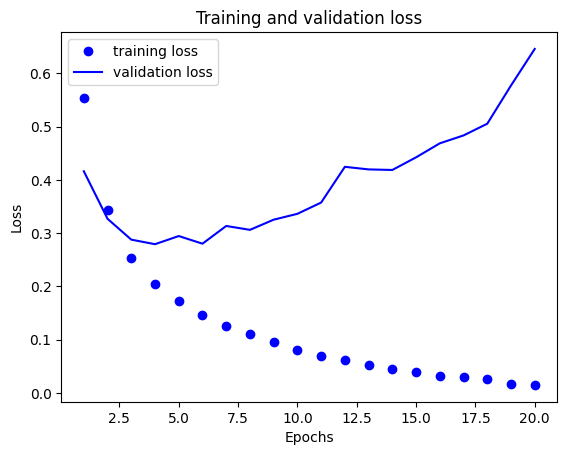

In [95]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

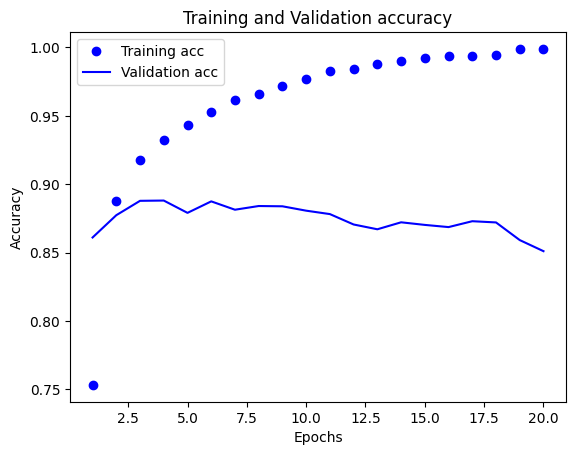

In [96]:
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [112]:
import numpy as np
#result = model.predict(test_data)
print(np.mean(history_dict['accuracy']))
#print(history_dict)

0.9589699923992157
